<a href="https://colab.research.google.com/github/ArunK-ML/Learn----Statsmodels-statistical-modeling-and-hypothesis-testing-/blob/main/StatsModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Taking Sample Data**

In [1]:
import pandas as pd
df = pd.read_csv("/content/slr (Sample Data).csv")
df

,Exam,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [2]:
x1 = df["Exam"]
y = df["GPA"]

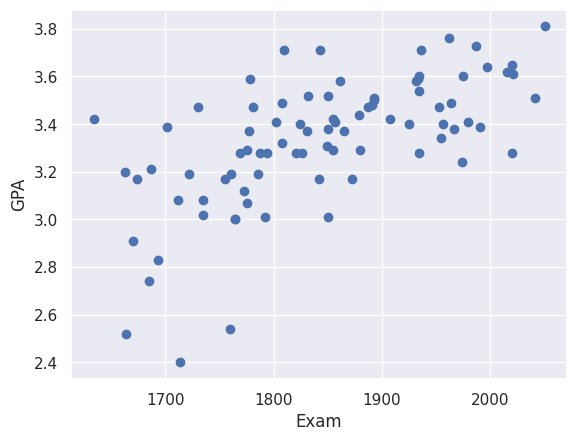

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.xlabel("Exam")
plt.ylabel("GPA")
plt.scatter(x1,y)
plt.show()

# **StatsModels**

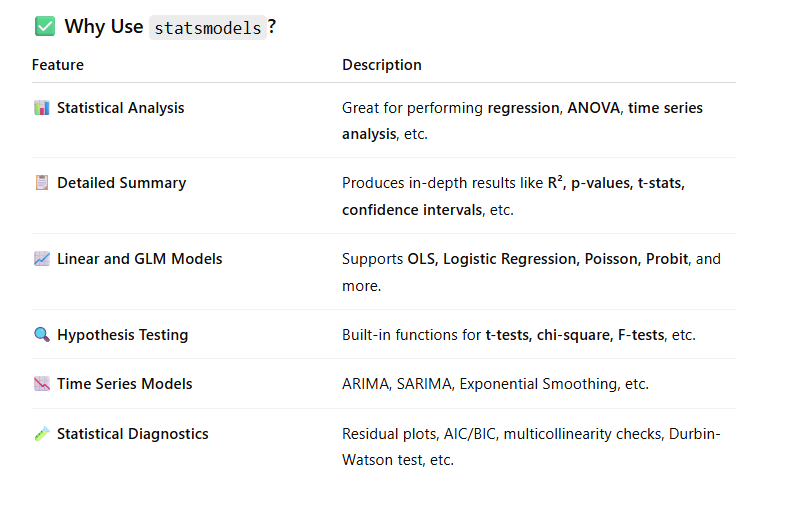

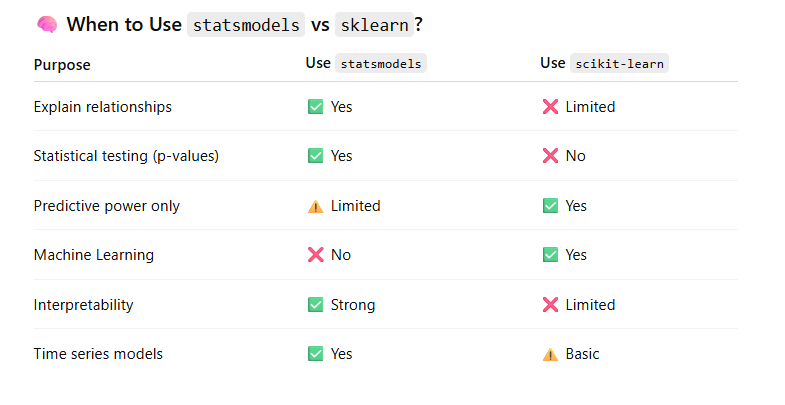

# **API Reference**

In [4]:
# Package

import statsmodels.api as sm

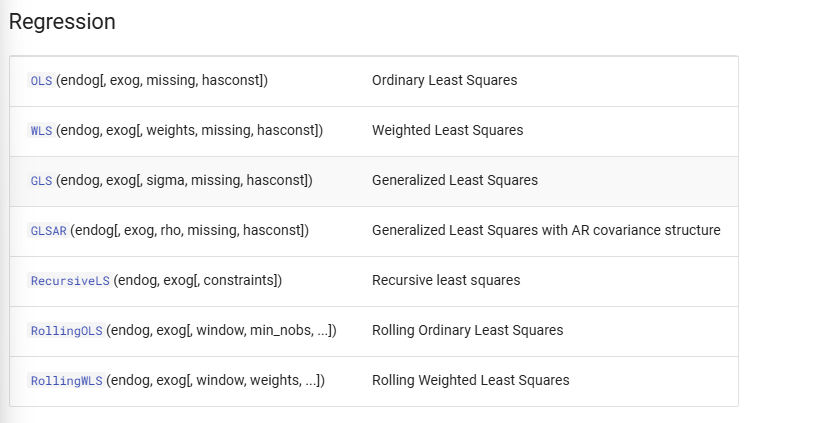

In statsmodels, regression is used to model the relationship between **dependent (Y)** and **independent (X)** variables, just like in scikit-learn — but with **detailed statistical output** like:

**p-values**

**R-squared**

**Confidence intervals**

**F-statistics**

And more...



**What is Regression? — Simple Explanation**

**Regression** is a **supervised machine learning technique** used to **predict a continuous value** (like price, salary, score, temperature) based on input variables.

🎯 **Purpose of Regression**

---> Find the **relationship** between **independent variables (X)** and a **dependent variable (Y)**

---> **Predict values** of Y based on new inputs X

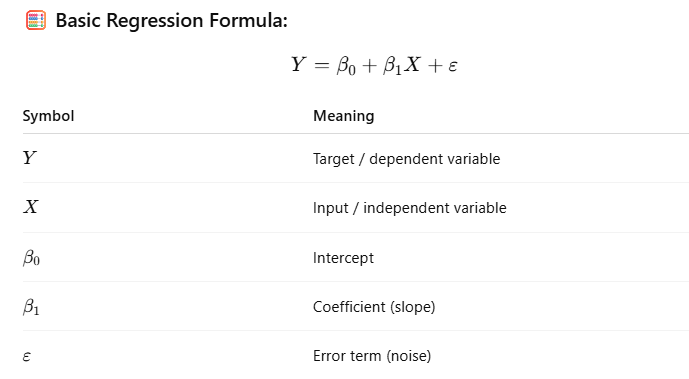

In [5]:
# We add a constant to include the intercept (β₀) in the regression equation.

x=sm.add_constant(x1)
x

,const,Exam
0,1.0,1714
1,1.0,1664
2,1.0,1760
3,1.0,1685
4,1.0,1693
...,...,...
79,1.0,1936
80,1.0,1810
81,1.0,1987
82,1.0,1962


In [6]:
# Model Trans by using OLS

model = sm.OLS(y,x).fit()